# Projeto 1 - Ciência dos Dados

Por Victor Vergara Arcoverde de Albuquerque Cavalcanti

## Pergunta 

**Países que se juntam a OTAN  aumentam sua participação no mercado mundial de armas?**

## Hipótese

A OTAN (Organização do Tratado do Atlântico Norte) promove o contato militar e político entre os seus membros, tendo como seus dois dos seus princípios principais a  proteção mútua e luta contra o terrorismo, mas por não ter um "standing army", ela depende dos exércitos de seus membros para realizar as sua operações. Assim a Organização obriga que o exécito de seus membros sejam bem equipados e modernizados, causando uma grande rotação de equipamentos e armamentos desses exécitos, e levando em conta que 7 dos 10 maiores exportadores de armas e equipamentos militares do planeta são membros da OTAN é razoável esperar que países da OTAN prefiram comprar de outros países membros ou seus aliados próximos que outros países. 

**Obs: Alguns links para os dados citados acima.**

 [Objetivos da OTAN.](:https://www.nato.int/cps/en/natohq/126169.html)

 [Ranking de exportação de equipamentos e armamentos militares.](:https://www.businessinsider.com/top-countries-exporting-weapons-arms-sales-2018-3#10-netherlands-1)

[Artigo que suporta a hipôtese apresentada](:https://www.voanews.com/europe/nato-defense-buildup-us-weapons-makers-could-benefit)


## Mecanismo


Para responder a pergunta será estudado os dados de importação e exportação de armamentos e equipamentos militares de alguns países que entraram na OTAN em 2004 antes e depois de se tornarem membros e alguns outros países como controle nos mesmos anos. Com os dados obtidos na análise será possível compará-los com a finalidade de descobrir caso eles tenham um comportamento parecido, ou se o fato de terem entrado na OTAN causou alguma mudança na importação e exportação de armamentos e equipamentos militares. 

## Bases de dados usadas

Os dados utilizados foram coletados do World Data Bank

Impotação de armamentos e equipamentos militares [World Bank (Importação)](:https://data.worldbank.org/indicator/MS.MIL.MPRT.KD)

Exportação de armamentos e equipamentos militares [World Bank (Exportação)](:https://data.worldbank.org/indicator/MS.MIL.XPRT.KD)

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np
plt.style.use("ggplot")

In [3]:

expor = pd.read_excel("Arms_exports.xlsx")
impor = pd.read_excel("Arms_imports.xlsx")
membros = pd.read_excel("NATO_members.xlsx")

### Preparação dos dados

In [4]:
impor = impor.set_index('country')
expor = expor.set_index('country')
data = impor.join(expor, how='inner', lsuffix='_im', rsuffix='_ex')

membros=['Belgium',"Bulgaria","Canada","Croatia" "Czech Republic", "Denmark","Estonia","France",
         "Germany", "Greece","Hungary","Iceland", "Italy","Latvia","Lithuania","Netherlands",
         "Norway","Portugal","Romania","Slovak Republic","Spain","Turkey","United Kingdom",
         "United States"]

In [5]:

lista_ex=[]
for a in expor.index:
    if a in membros:
        lista_ex.append(True)
    else:
        lista_ex.append(False)
        
expor["OTAN"]=lista_ex

lista_im=[]
for a in impor.index:
    if a in membros:
        lista_im.append(True)
    else:
        lista_im.append(False)

impor["OTAN"]=lista_im

lista_data=[]
for a in data.index:
    if a in membros:
        lista_data.append(True)
    else:
        lista_data.append(False)
data["OTAN"]=lista_data

expor_n_membros= expor.loc[(expor.OTAN==False),:]
expor_membros= expor.loc[(expor.OTAN==True),:]
impor_n_membros= impor.loc[(impor.OTAN==False), :]
impor_membros= impor.loc[(impor.OTAN==True), :]


In [6]:
#Dara frame com apenas os membros que entraram em 2004
expor_membros_janela=expor.loc[["Bulgaria", "Czech Republic","Estonia", "Hungary","Latvia",
                                "Lithuania","Romania","Slovak Republic"],:]
expor_membros_janela_2004= expor_membros_janela.loc[:, [2001,2002,2003,2004,2005,2006,2007]]
expor_membros_janela_2004

,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,
Bulgaria,10000000.0,32000000.0,44000000.0,19000000.0,86000000.0,5000000.0,9000000.0
Czech Republic,88000000.0,60000000.0,64000000.0,1000000.0,70000000.0,44000000.0,32000000.0
Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hungary,NaN,34000000.0,NaN,NaN,82000000.0,NaN,9000000.0
Latvia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lithuania,NaN,3000000.0,NaN,NaN,NaN,NaN,NaN
Romania,NaN,NaN,24000000.0,NaN,3000000.0,8000000.0,32000000.0
Slovak Republic,53000000.0,32000000.0,NaN,46000000.0,NaN,7000000.0,22000000.0


In [7]:
impor_membros_janela=impor.loc[["Bulgaria", "Czech Republic","Estonia", "Hungary","Latvia",
                                "Lithuania","Romania","Slovak Republic"],:]
impor_membros_janela_2004= impor_membros_janela.loc[:, [2001,2002,2003,2004,2005,2006,2007]]
impor_membros_janela_2004

,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,
Bulgaria,NaN,NaN,2000000.0,12000000.0,132000000.0,22000000.0,48000000.0
Czech Republic,65000000.0,48000000.0,97000000.0,7000000.0,594000000.0,45000000.0,10000000.0
Estonia,NaN,1000000.0,13000000.0,8000000.0,20000000.0,7000000.0,19000000.0
Hungary,14000000.0,NaN,NaN,72000000.0,13000000.0,253000000.0,196000000.0
Latvia,13000000.0,3000000.0,25000000.0,12000000.0,4000000.0,9000000.0,51000000.0
Lithuania,16000000.0,12000000.0,1000000.0,47000000.0,9000000.0,52000000.0,4000000.0
Romania,19000000.0,16000000.0,17000000.0,285000000.0,437000000.0,61000000.0,98000000.0
Slovak Republic,NaN,27000000.0,NaN,NaN,4000000.0,NaN,NaN


In [8]:
data_ex_membros=expor_membros_janela_2004.loc[["Czech Republic","Bulgaria","Romania",],[2003,2005,2007]]
data_im_membros=impor_membros_janela_2004.loc[["Czech Republic","Bulgaria","Romania",],[2003,2005,2007]]

data_membros = data_ex_membros.join(data_im_membros, how='inner', rsuffix='_im', lsuffix='_ex')

lista_controle=['Finland','Switzerland','Sweden']

data_im_controle= impor_n_membros.loc[['Finland','Switzerland','Sweden'],[2003,2005,2007]]
data_ex_controle= expor_n_membros.loc[['Finland','Switzerland','Sweden'],[2003,2005,2007]]


data_controle = data_ex_controle.join(data_im_controle, how='inner', rsuffix='_im', lsuffix='_ex')




## Análise de dados

In [9]:
data_membros

,2003_ex,2005_ex,2007_ex,2003_im,2005_im,2007_im
country,,,,,,
Czech Republic,64000000.0,70000000.0,32000000.0,97000000.0,594000000.0,10000000.0
Bulgaria,44000000.0,86000000.0,9000000.0,2000000.0,132000000.0,48000000.0
Romania,24000000.0,3000000.0,32000000.0,17000000.0,437000000.0,98000000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000188B4200DD8>,
      dtype=object)

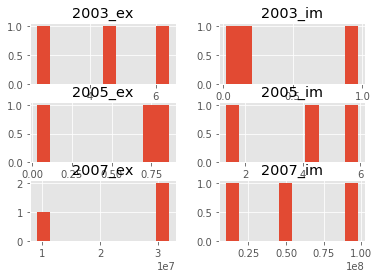

In [18]:
data_membros.hist()

In [10]:
data_controle

,2003_ex,2005_ex,2007_ex,2003_im,2005_im,2007_im
country,,,,,,
Finland,40000000.0,51000000.0,77000000.0,227000000.0,107000000.0,108000000.0
Switzerland,184000000.0,252000000.0,301000000.0,117000000.0,168000000.0,108000000.0
Sweden,515000000.0,532000000.0,334000000.0,64000000.0,78000000.0,50000000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000188B403BE10>,
      dtype=object)

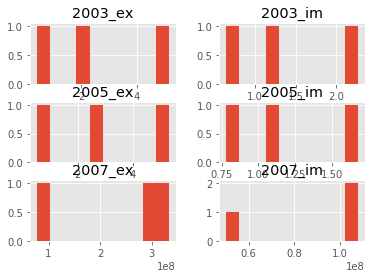

In [19]:
data_controle.hist()

In [21]:
plt.plot(data_membros.loc[[2003],:])

KeyError: 'None of [[2003]] are in the [index]'

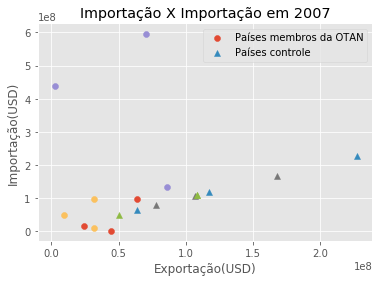

In [14]:

plt.scatter(data_membros['2003_ex'], data_membros['2003_im'], marker='o')
plt.scatter(data_controle['2003_im'], data_controle['2003_im'],marker='^')
plt.xlabel('Exportação(USD)')
plt.ylabel('Importação(USD)')
plt.title('Importação X Importação em 2003')
plt.legend(('Países membros da OTAN','Países controle'),loc='center right', bbox_to_anchor=(1,0.9))




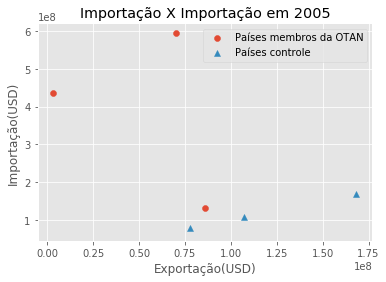

In [15]:
plt.scatter(data_membros['2005_ex'], data_membros['2005_im'], marker='o')
plt.scatter(data_controle['2005_im'], data_controle['2005_im'],marker='^')
plt.xlabel('Exportação(USD)')
plt.ylabel('Importação(USD)')
plt.title('Importação X Importação em 2005')
plt.legend(('Países membros da OTAN','Países controle'),loc='center right', bbox_to_anchor=(1,0.9))



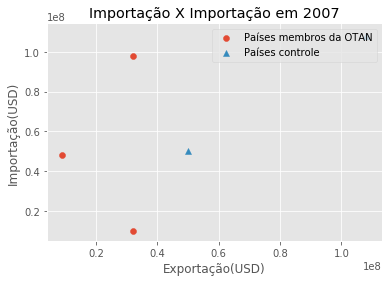

In [16]:
plt.scatter(data_membros['2007_ex'], data_membros['2007_im'], marker='o')
plt.scatter(data_controle['2007_im'], data_controle['2007_im'],marker='^')
plt.xlabel('Exportação(USD)')
plt.ylabel('Importação(USD)')
plt.title('Importação X Importação em 2007')
plt.legend(('Países membros da OTAN','Países controle'),loc='center right', bbox_to_anchor=(1,0.9))


## Conclusão